Importing Libraries

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from datetime import datetime, timedelta

EDA

In [121]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Superstore - Sales Data.csv")

df_original = df.copy()  # Create a copy of the original dataset

print(df.info())  # Overview of dataset
print(df.describe())  # Summary statistics for numerical columns
print(df.isnull().sum())  # Check missing values in each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [122]:
# Check for missing values
missing_values = df.isnull().sum()

# Display only columns with missing values
missing_values = missing_values[missing_values > 0]

# Print result
if missing_values.empty:
    print("No missing values in the dataset.")
else:
    print("Missing values detected:\n", missing_values)


No missing values in the dataset.


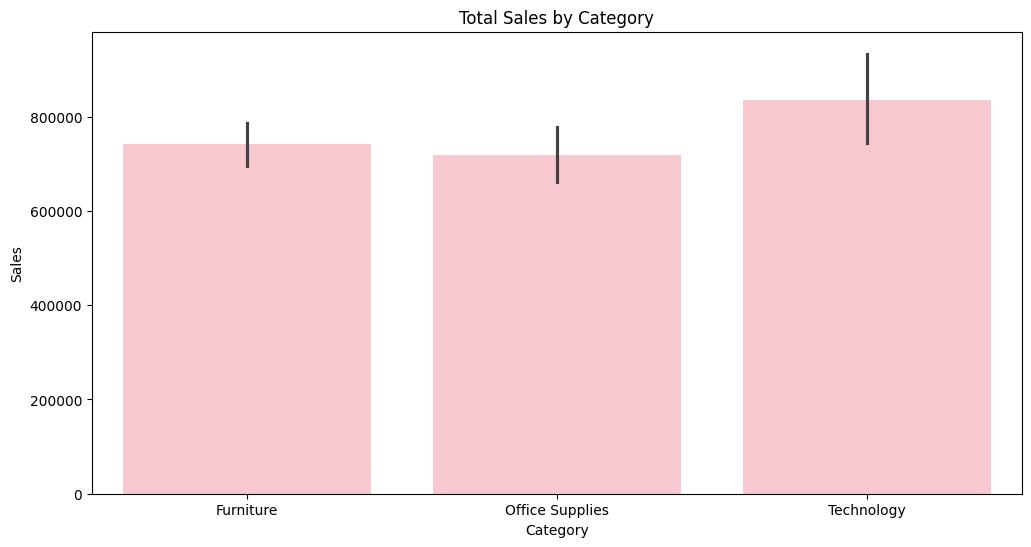

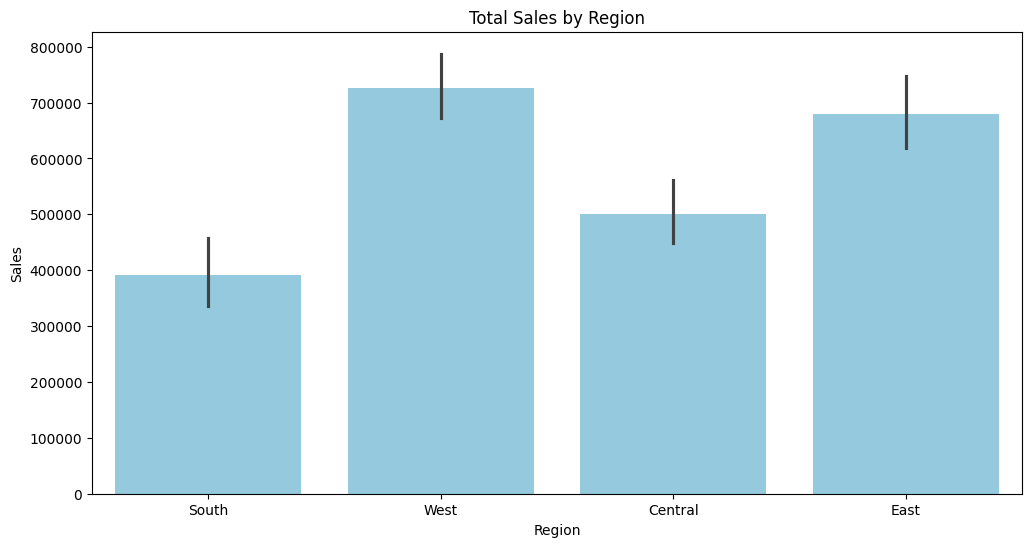

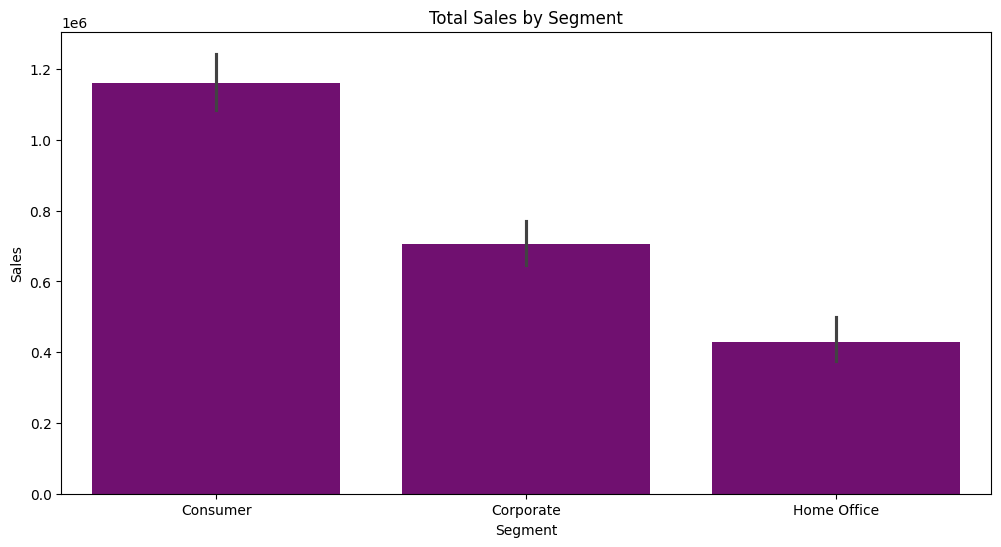

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='Sales', data=df, estimator=np.sum, color="pink")
plt.title("Total Sales by Category")
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Sales', data=df, estimator=np.sum, color="skyblue")
plt.title("Total Sales by Region")
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Segment', y='Sales', data=df, estimator=np.sum, color="purple")
plt.title("Total Sales by Segment")
plt.show()

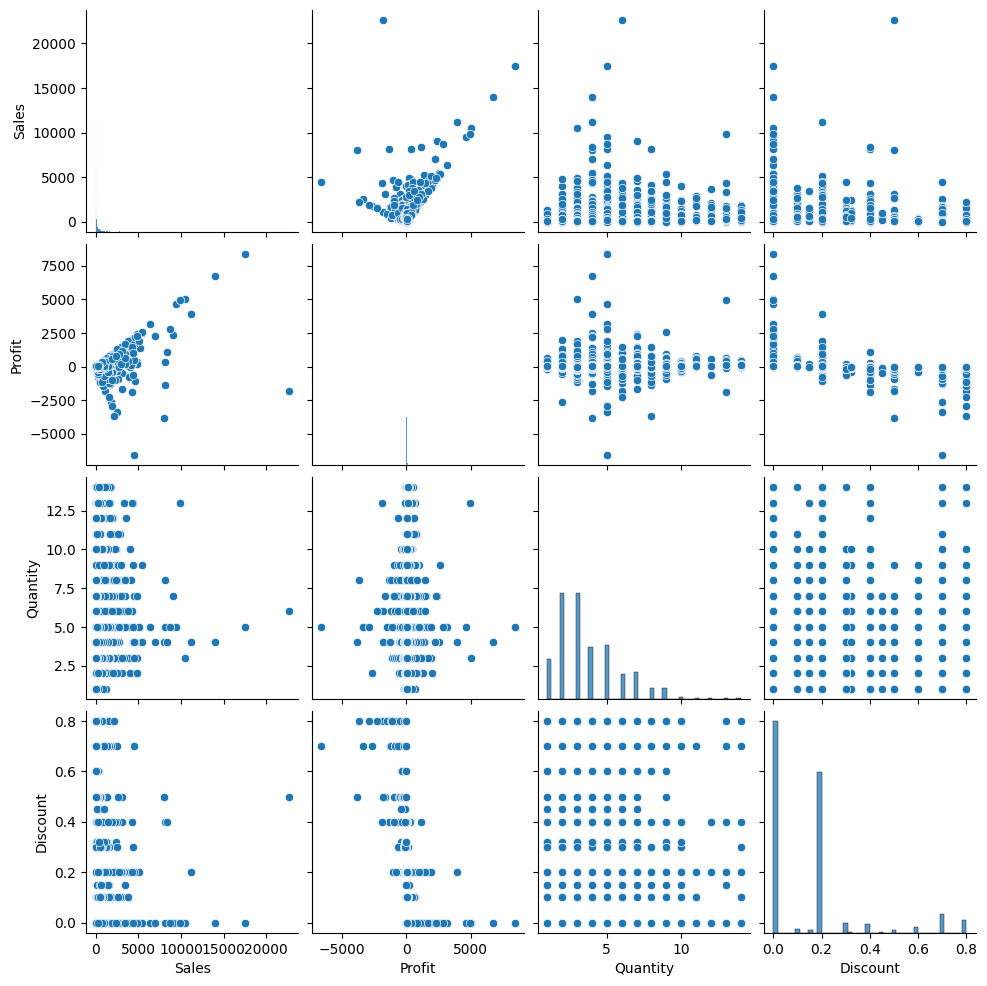

In [124]:
import seaborn as sns

sns.pairplot(df[['Sales', 'Profit', 'Quantity', 'Discount']])
plt.show()

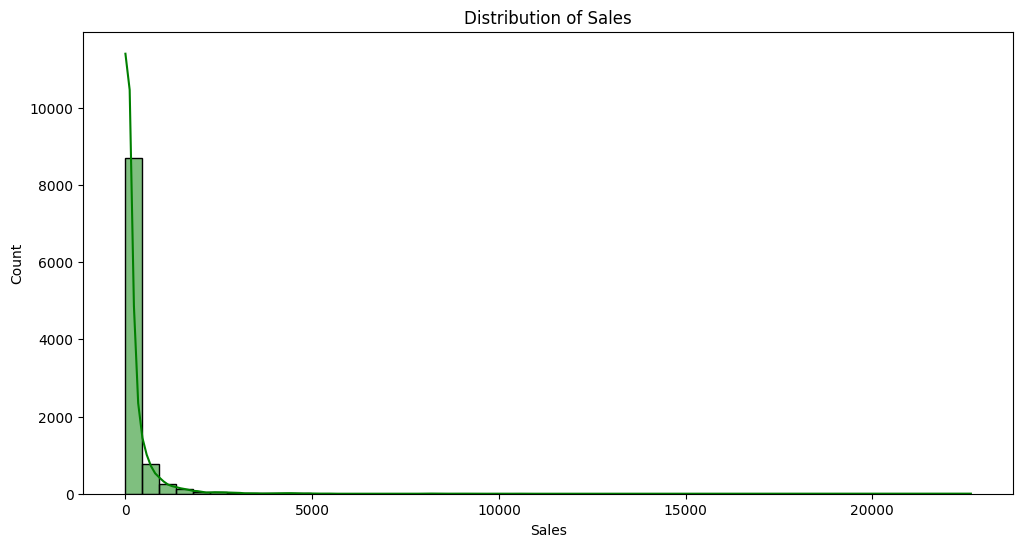

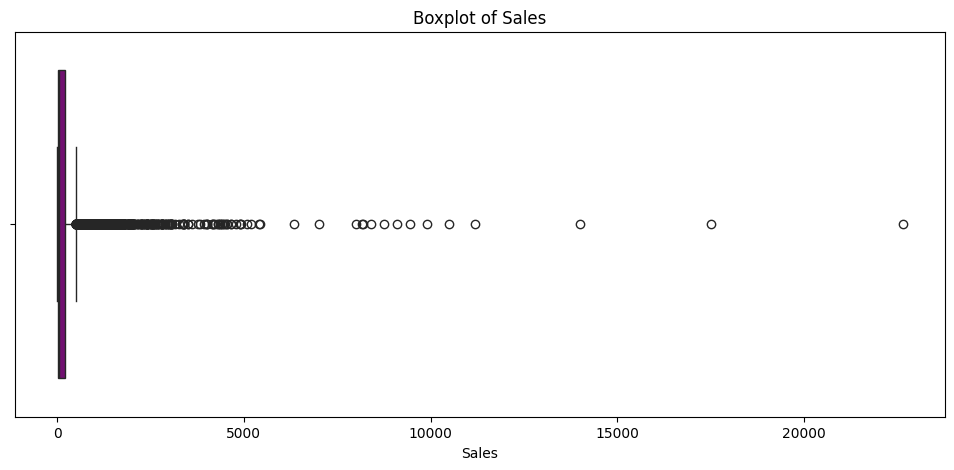

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(df['Sales'], bins=50, kde=True, color="green")
plt.title("Distribution of Sales")
plt.show()

plt.figure(figsize=(12, 5))
sns.boxplot(x=df['Sales'], color="purple")
plt.title("Boxplot of Sales")
plt.show()


In [126]:
df['Sales'].skew()

np.float64(12.97275234181623)

In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Order Date' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Extract 'Year' and 'Month' from 'Order Date'
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

last_date = pd.to_datetime(df['Order Date']).max()

# Verify the conversion
print(df[['Order Date', 'Year', 'Month']].head())

# Summary statistics
print(df.describe())

# Check data types
print(df.info())


  Order Date  Year  Month
0 2016-11-08  2016     11
1 2016-11-08  2016     11
2 2016-06-12  2016      6
3 2015-10-11  2015     10
4 2015-10-11  2015     10
       Row ID                     Order Date  Postal Code    Sales  Quantity  \
count 9994.00                           9994      9994.00  9994.00   9994.00   
mean  4997.50  2016-04-30 00:07:12.259355648     55190.38   229.86      3.79   
min      1.00            2014-01-03 00:00:00      1040.00     0.44      1.00   
25%   2499.25            2015-05-23 00:00:00     23223.00    17.28      2.00   
50%   4997.50            2016-06-26 00:00:00     56430.50    54.49      3.00   
75%   7495.75            2017-05-14 00:00:00     90008.00   209.94      5.00   
max   9994.00            2017-12-30 00:00:00     99301.00 22638.48     14.00   
std   2885.16                            NaN     32063.69   623.25      2.23   

       Discount   Profit    Year   Month  
count   9994.00  9994.00 9994.00 9994.00  
mean       0.16    28.66 2015.72    7

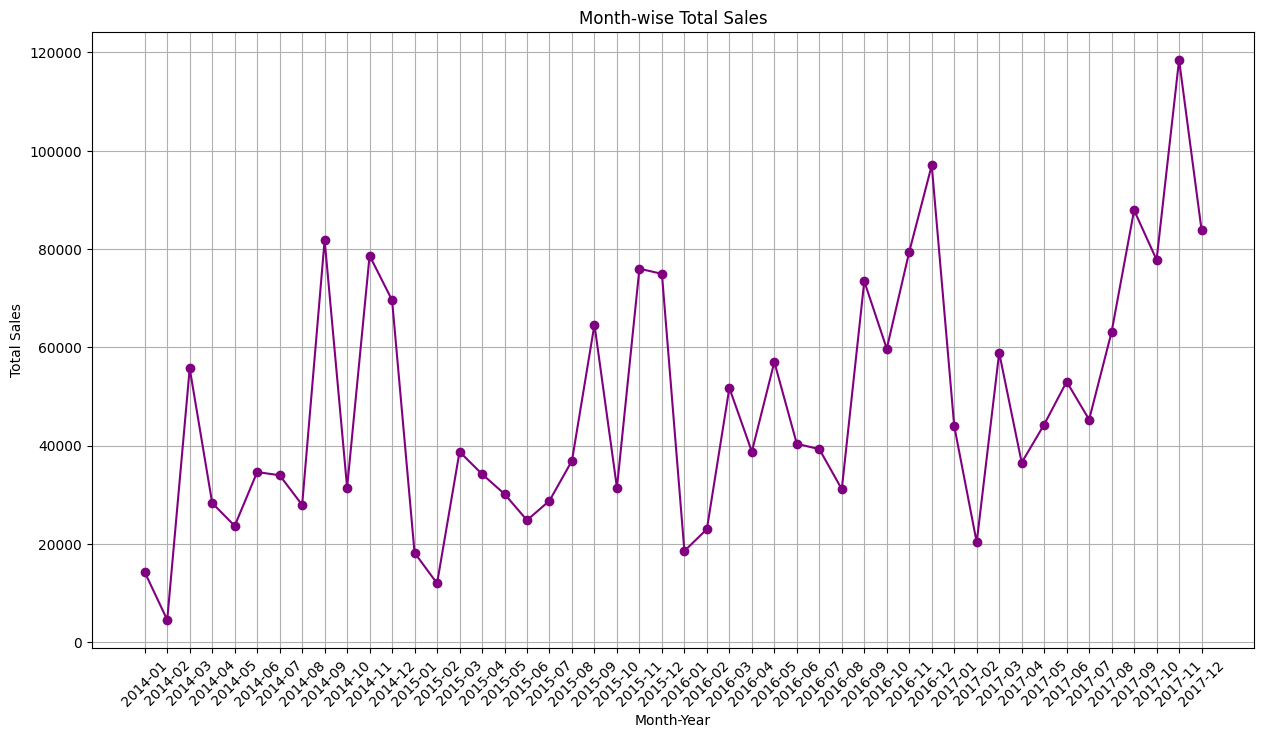

In [128]:
import matplotlib.pyplot as plt

# Convert 'Order Date' column to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Extract Year and Month
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

# Group by Year & Month and calculate total sales
monthly_sales = df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

# Create 'Year-Month' column for visualization
monthly_sales['Year-Month'] = monthly_sales['Year'].astype(str) + '-' + monthly_sales['Month'].astype(str).str.zfill(2)

# Plot Month-wise Total Sales
plt.figure(figsize=(15, 8))
plt.plot(monthly_sales['Year-Month'], monthly_sales['Sales'], marker='o', linestyle='-', color='purple')
plt.xticks(rotation=45)
plt.xlabel("Month-Year")
plt.ylabel("Total Sales")
plt.title("Month-wise Total Sales")
plt.grid(True)
plt.show()

Data Cleaning

In [129]:
Q1 = df['Sales'].quantile(0.25)  # First quartile
Q3 = df['Sales'].quantile(0.75)  # Third quartile
IQR = Q3 - Q1  # Interquartile range

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Sales'] < lower_bound) | (df['Sales'] > upper_bound)]
print(f"Number of Outliers: {len(outliers)}")


Number of Outliers: 1167


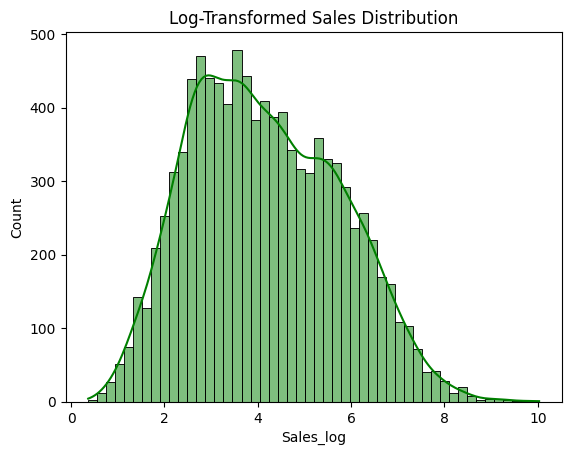

In [130]:
df['Sales_log'] = np.log1p(df['Sales'])  # log1p avoids log(0)
sns.histplot(df['Sales_log'], bins=50, kde=True, color='green')
plt.title("Log-Transformed Sales Distribution")
plt.show()

In [131]:
df[['Sales_log', 'Sales']]

,Sales_log,Sales
0,5.57,261.96
1,6.60,731.94
2,2.75,14.62
3,6.87,957.58
4,3.15,22.37
...,...,...
9989,3.27,25.25
9990,4.53,91.96
9991,5.56,258.58
9992,3.42,29.60


Splitting Data

In [132]:
# Encode categorical variables
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Convert datetime columns to numerical features
for col in df.select_dtypes(include=['datetime64']).columns:
    df[col + '_year'] = df[col].dt.year
    df[col + '_month'] = df[col].dt.month
    df[col + '_day'] = df[col].dt.day
    df.drop(columns=[col], inplace=True)

cols_to_drop = [col for col in df.columns if ('id' in col.lower()) or ('name' in col.lower())]
df = df.drop(cols_to_drop, axis=1)

# Define target variable and features
target = 'Sales'
features = [col for col in df.columns if col != target]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df, df[target], test_size=0.3, random_state=42)

# Identify numerical features for scaling
numerical_features = [col for col in X_train.columns if df[col].dtype in ['int64', 'float64']]

# Scale only numerical features
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test_scaled[numerical_features] = scaler.transform(X_test[numerical_features])


In [133]:
df

,Ship Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Year,Month,Sales_log,Order Date_year,Order Date_month,Order Date_day
0,219,2,0,0,194,15,42420,2,0,4,261.96,2,0.00,41.91,2016,11,5.57,2016,11,8
1,219,2,0,0,194,15,42420,2,0,5,731.94,3,0.00,219.58,2016,11,6.60,2016,11,8
2,906,2,1,0,266,3,90036,3,1,10,14.62,2,0.00,6.87,2016,6,2.75,2016,6,12
3,128,3,0,0,153,8,33311,2,0,16,957.58,5,0.45,-383.03,2015,10,6.87,2015,10,11
4,128,3,0,0,153,8,33311,2,1,14,22.37,2,0.20,2.52,2015,10,3.15,2015,10,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,43,2,0,0,295,8,33180,2,0,9,25.25,3,0.20,4.10,2014,1,3.27,2014,1,21
9990,620,3,0,0,104,3,92627,3,0,9,91.96,2,0.00,15.63,2017,2,4.53,2017,2,26
9991,620,3,0,0,104,3,92627,3,2,13,258.58,2,0.20,19.39,2017,2,5.56,2017,2,26
9992,620,3,0,0,104,3,92627,3,1,12,29.60,4,0.00,13.32,2017,2,3.42,2017,2,26


Model Training (without feature engineering)

In [134]:
# Function to evaluate models
def evaluate_model(y_test, y_pred, model_name):

    print(f"\n{model_name} Performance:")
    print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
    print(f"R2 Score: {r2_score(y_test, y_pred):.4f}")

# Train and Evaluate Random Forest Model
rf = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

# Train and Evaluate Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, max_depth=5, subsample=0.9, random_state=42)
gbr.fit(X_train_scaled, y_train)
y_pred_gbr = gbr.predict(X_test_scaled)

# Split your training data further into training and validation sets
X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train_scaled, y_train, test_size=0.2, random_state=42
)

# Train and Evaluate XGBRegressor
xgb_reg = XGBRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)


xgb_reg.fit(
    X_train_final, y_train_final,
    eval_set=[(X_val, y_val)],
    verbose=False
)

y_pred_xgb = xgb_reg.predict(X_test_scaled)

# Use a shallow tree as base estimator
base_estimator = DecisionTreeRegressor(max_depth=4)

ada_reg = AdaBoostRegressor(
    estimator=base_estimator,
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)

ada_reg.fit(X_train_scaled, y_train)
y_pred_ada = ada_reg.predict(X_test_scaled)
evaluate_model(y_test, y_pred_xgb, "AdaBoost")

models = {
    "Random Forest": rf,
    "Gradient Boosting": gbr,
    "XGBoost": xgb_reg,
    "AdaBoost": ada_reg
}

# Loop through each model and evaluate on train and test
for name, model in models.items():

    # Train predictions
    y_train_pred = model.predict(X_train_scaled)
    evaluate_model(y_train, y_train_pred, f"{name} Training")

    # Test predictions
    y_test_pred = model.predict(X_test_scaled)
    evaluate_model(y_test, y_test_pred, f"{name} Test")


AdaBoost Performance:
MAE: 25.66
RMSE: 328.54
R2 Score: 0.8036

Random Forest Training Performance:
MAE: 1.05
RMSE: 33.75
R2 Score: 0.9964

Random Forest Test Performance:
MAE: 5.55
RMSE: 197.46
R2 Score: 0.9291

Gradient Boosting Training Performance:
MAE: 0.21
RMSE: 0.32
R2 Score: 1.0000

Gradient Boosting Test Performance:
MAE: 4.38
RMSE: 171.58
R2 Score: 0.9464

XGBoost Training Performance:
MAE: 1.99
RMSE: 35.18
R2 Score: 0.9961

XGBoost Test Performance:
MAE: 25.66
RMSE: 328.54
R2 Score: 0.8036

AdaBoost Training Performance:
MAE: 23.00
RMSE: 27.34
R2 Score: 0.9977

AdaBoost Test Performance:
MAE: 27.04
RMSE: 162.40
R2 Score: 0.9520


Feature Importance

In [135]:
# Ensure preprocessing is done
from sklearn.preprocessing import StandardScaler

# Define target variable and features
target = 'Sales'
features = [col for col in df.columns if col != target]

# Split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.3, random_state=42)

# Scale numerical features
scaler = StandardScaler()
numerical_features = [col for col in X_train.columns if df[col].dtype in ['int64', 'float64']]
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test_scaled[numerical_features] = scaler.transform(X_test[numerical_features])


In [136]:
from sklearn.feature_selection import RFE

selector = RFE(RandomForestRegressor(n_estimators=100, random_state=42), n_features_to_select=10)
selector.fit(X_train_scaled, y_train)
selected_features = X_train_scaled.columns[selector.support_]
print("Selected Features:", selected_features)


Selected Features: Index(['Ship Date', 'Ship Mode', 'Segment', 'City', 'State', 'Postal Code',
       'Profit', 'Month', 'Sales_log', 'Order Date_year'],
      dtype='object')


Model Training

In [179]:
# Encode categorical variables
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Convert datetime columns to numerical features
for col in df.select_dtypes(include=['datetime64']).columns:
    df[col + '_year'] = df[col].dt.year
    df[col + '_month'] = df[col].dt.month
    df[col + '_day'] = df[col].dt.day
    df.drop(columns=[col], inplace=True)

# Define target variable and features
target = 'Sales'
features = [col for col in df.columns if col != target]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[selected_features], df[target], test_size=0.3, random_state=42)

# Identify numerical features for scaling
numerical_features = [col for col in X_train.columns if df[col].dtype in ['int64', 'float64']]

# Scale only numerical features
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test_scaled[numerical_features] = scaler.transform(X_test[numerical_features])

# Train and Evaluate Random Forest Model
rf = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

# Train and Evaluate Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, max_depth=5, subsample=0.9, random_state=42)
gbr.fit(X_train_scaled, y_train)
y_pred_gbr = gbr.predict(X_test_scaled)

# Split your training data further into training and validation sets
X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train_scaled, y_train, test_size=0.2, random_state=42
)

# Train and Evaluate XGBRegressor
xgb_reg = XGBRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)


xgb_reg.fit(
    X_train_final, y_train_final,
    eval_set=[(X_val, y_val)],
    verbose=False
)

y_pred_xgb = xgb_reg.predict(X_test_scaled)

# Use a shallow tree as base estimator
base_estimator = DecisionTreeRegressor(max_depth=4)

ada_reg = AdaBoostRegressor(
    estimator=base_estimator,
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)

ada_reg.fit(X_train_scaled, y_train)
y_pred_ada = ada_reg.predict(X_test_scaled)

models = {
    "Random Forest": rf,
    "Gradient Boosting": gbr,
    "XGBoost": xgb_reg,
    "AdaBoost": ada_reg
}

# Loop through each model and evaluate on train and test
for name, model in models.items():

    # Train predictions
    y_train_pred = model.predict(X_train_scaled)
    evaluate_model(y_train, y_train_pred, f"{name} Training")

    # Test predictions
    y_test_pred = model.predict(X_test_scaled)
    evaluate_model(y_test, y_test_pred, f"{name} Test")


Random Forest Training Performance:
MAE: 0.89
RMSE: 30.71
R2 Score: 0.9970

Random Forest Test Performance:
MAE: 5.69
RMSE: 206.09
R2 Score: 0.9227

Gradient Boosting Training Performance:
MAE: 0.21
RMSE: 0.32
R2 Score: 1.0000

Gradient Boosting Test Performance:
MAE: 4.77
RMSE: 196.32
R2 Score: 0.9299

XGBoost Training Performance:
MAE: 3.18
RMSE: 43.58
R2 Score: 0.9940

XGBoost Test Performance:
MAE: 29.64
RMSE: 383.38
R2 Score: 0.7326

AdaBoost Training Performance:
MAE: 22.83
RMSE: 26.64
R2 Score: 0.9978

AdaBoost Test Performance:
MAE: 28.03
RMSE: 232.68
R2 Score: 0.9015


Actual vs Predicted Sales Visualization

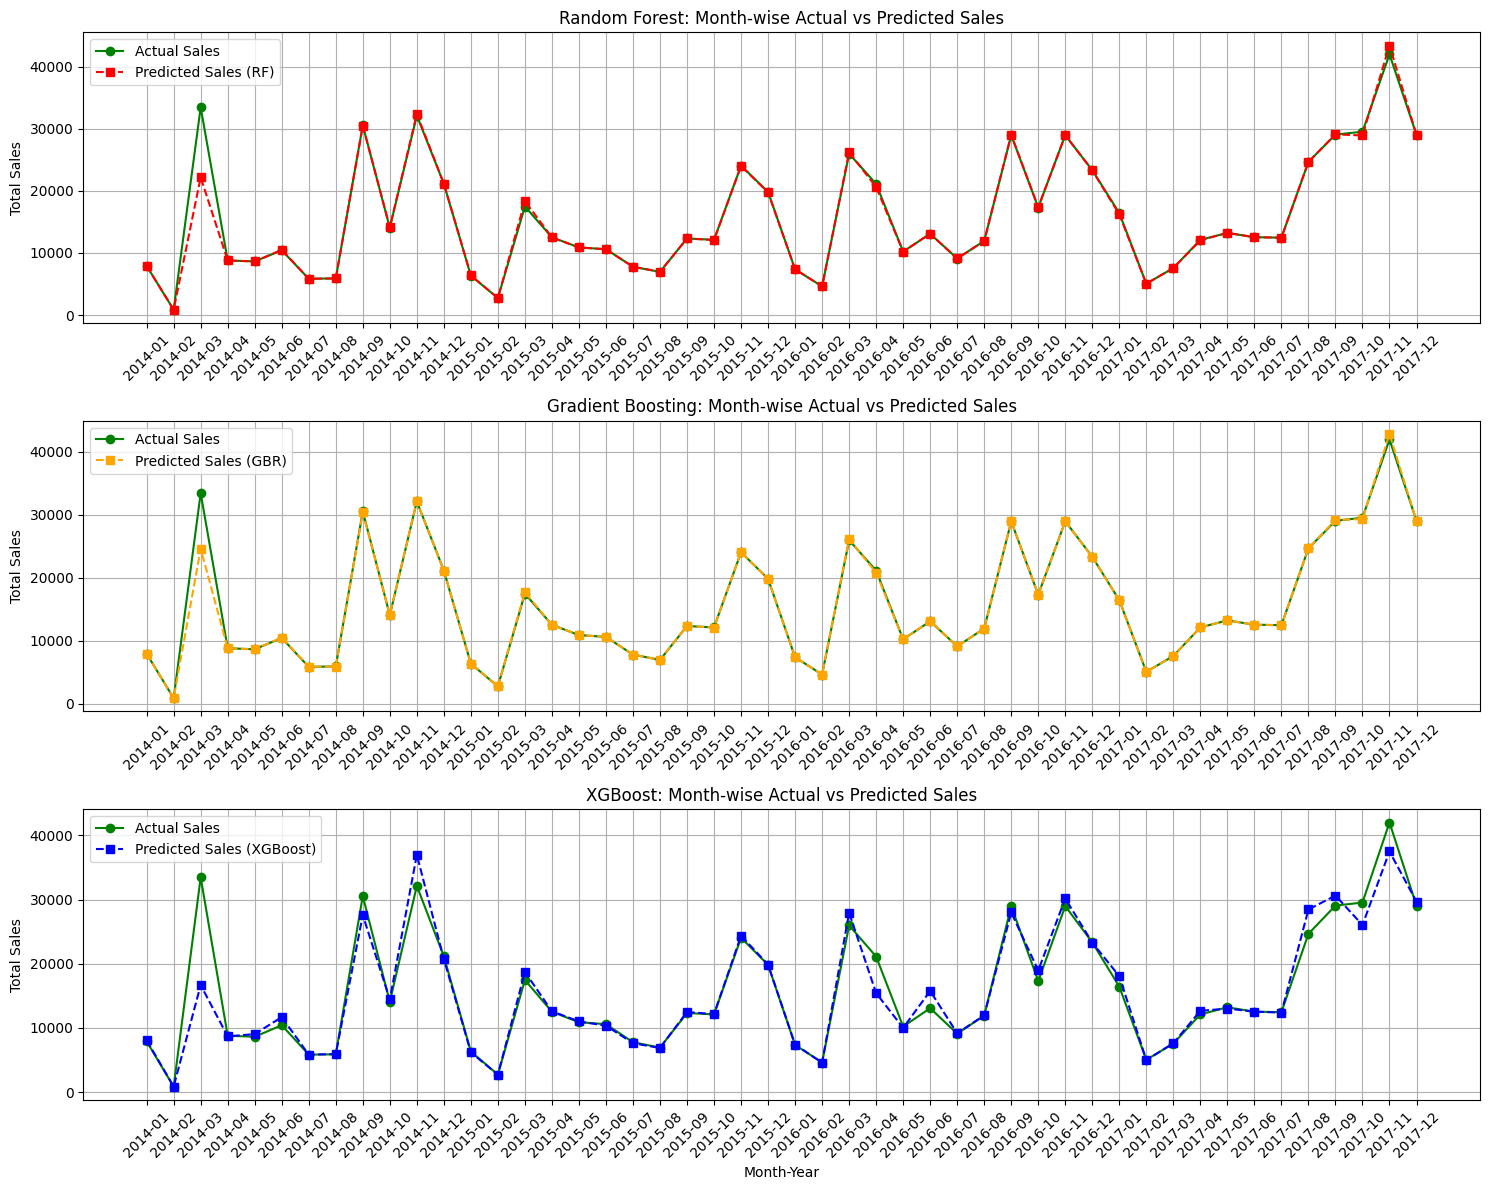

In [139]:
# Restore 'Order Date' for actual vs predicted comparison
X_test_with_dates = X_test.copy()
X_test_with_dates['Sales'] = y_test
X_test_with_dates['Predicted_RF'] = y_pred_rf
X_test_with_dates['Predicted_GBR'] = y_pred_gbr
X_test_with_dates['Predicted_XGB'] = y_pred_xgb

# Ensure 'Order Date' is in datetime format
df_original['Order Date'] = pd.to_datetime(df_original['Order Date'], errors='coerce')

# Restore 'Order Date' for actual vs predicted comparison
X_test_with_dates = X_test.copy()
X_test_with_dates['Sales'] = y_test
X_test_with_dates['Predicted_RF'] = y_pred_rf
X_test_with_dates['Predicted_GBR'] = y_pred_gbr
X_test_with_dates['Predicted_XGB'] = y_pred_xgb

# Retrieve 'Year' and 'Month' from original dataset
X_test_with_dates['Year'] = df_original.loc[X_test_with_dates.index, 'Order Date'].dt.year
X_test_with_dates['Month'] = df_original.loc[X_test_with_dates.index, 'Order Date'].dt.month


# Retrieve 'Year' and 'Month' from original dataset
X_test_with_dates['Year'] = df_original.loc[X_test_with_dates.index, 'Order Date'].dt.year
X_test_with_dates['Month'] = df_original.loc[X_test_with_dates.index, 'Order Date'].dt.month

# Group by Year and Month
monthly_results = X_test_with_dates.groupby(['Year', 'Month'])[['Sales', 'Predicted_RF', 'Predicted_GBR', 'Predicted_XGB']].sum().reset_index()

# Create 'Year-Month' column for visualization
monthly_results['Year-Month'] = monthly_results['Year'].astype(str) + '-' + monthly_results['Month'].astype(str).str.zfill(2)

# Plot actual vs predicted sales
plt.figure(figsize=(15, 12))

plt.subplot(3, 1, 1)
plt.plot(monthly_results['Year-Month'], monthly_results['Sales'], marker='o', linestyle='-', label="Actual Sales", color='green')
plt.plot(monthly_results['Year-Month'], monthly_results['Predicted_RF'], marker='s', linestyle='--', label="Predicted Sales (RF)", color='red')
plt.xticks(rotation=45)
plt.ylabel("Total Sales")
plt.title("Random Forest: Month-wise Actual vs Predicted Sales")
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(monthly_results['Year-Month'], monthly_results['Sales'], marker='o', linestyle='-', label="Actual Sales", color='green')
plt.plot(monthly_results['Year-Month'], monthly_results['Predicted_GBR'], marker='s', linestyle='--', label="Predicted Sales (GBR)", color='orange')
plt.xticks(rotation=45)
plt.ylabel("Total Sales")
plt.title("Gradient Boosting: Month-wise Actual vs Predicted Sales")
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(monthly_results['Year-Month'], monthly_results['Sales'], marker='o', linestyle='-', label="Actual Sales", color='green')
plt.plot(monthly_results['Year-Month'], monthly_results['Predicted_XGB'], marker='s', linestyle='--', label="Predicted Sales (XGBoost)", color='blue')
plt.xticks(rotation=45)
plt.xlabel("Month-Year")
plt.ylabel("Total Sales")
plt.title("XGBoost: Month-wise Actual vs Predicted Sales")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

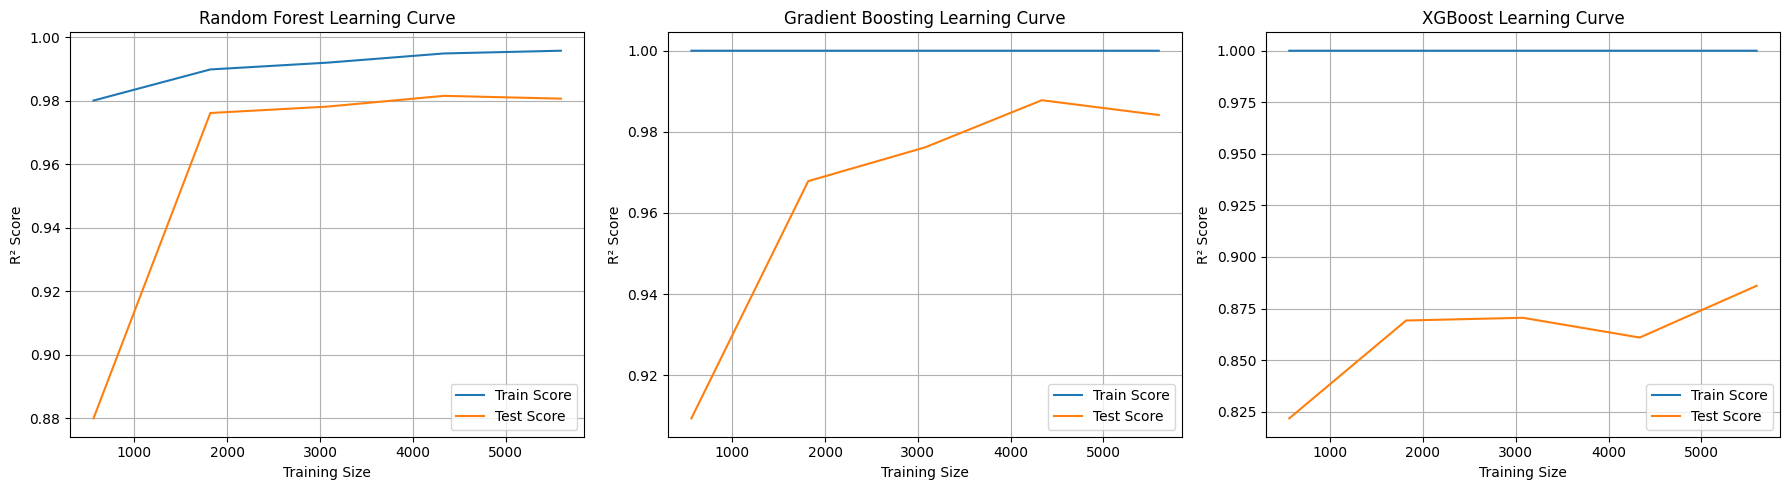

In [141]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

def plot_learning_curve_ax(ax, estimator, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y,
        cv=5,
        scoring='r2',
        train_sizes=np.linspace(0.1, 1.0, 5),
        random_state=42
    )
    train_mean = train_scores.mean(axis=1)
    test_mean = test_scores.mean(axis=1)

    ax.plot(train_sizes, train_mean, label="Train Score")
    ax.plot(train_sizes, test_mean, label="Test Score")
    ax.set_title(title)
    ax.set_xlabel("Training Size")
    ax.set_ylabel("R² Score")
    ax.legend()
    ax.grid(True)

# Create a single figure with 3 subplots side by side
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

plot_learning_curve_ax(axes[0], rf, X_train_scaled, y_train, "Random Forest Learning Curve")
plot_learning_curve_ax(axes[1], gbr, X_train_scaled, y_train, "Gradient Boosting Learning Curve")
plot_learning_curve_ax(axes[2], xgb_reg, X_train_scaled, y_train, "XGBoost Learning Curve")

plt.tight_layout()
plt.show()
